In [1]:
from torchvision.ops import box_iou
import os
import pandas as pd
import json
import torch
import seaborn as sns

/mnt/SSD0/safal/AI_assisted_microscopy_system/codes/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BASE_DIR = "/mnt/Enterprise/safal/AI_assisted_microscopy_system/"
sample_types = [
    "smartphone_sample",
    "smartphone_reference",
    "brightfield_sample",
    "brightfield_reference",
]
model_type = "yolov8"
sample_type="smartphone_sample"

In [3]:
gt_annotations_file = os.path.join(
    BASE_DIR,
    "cysts_dataset_all",
    sample_type,
    "fold_5",
    f"{sample_type}_coco_annos_val.json",
)
pred_annotations_file = os.path.join(
    BASE_DIR,
    "outputs",
    sample_type,
    model_type,
    "fold_5",
    "mmdetection_cysts",
    f"yolov8_{sample_type}_fold_5",
    # "results.bbox.json"
    "predictions.json"
)


In [4]:
gt_annos = json.load(open(gt_annotations_file))

In [5]:
pred_annos_df = pd.read_json(pred_annotations_file)

In [6]:
# change bbox format to x1, y1, x2, y2
pred_annos_df["bbox"] = pred_annos_df["bbox"].apply(
    lambda x: [x[0], x[1], x[0] + x[2], x[1] + x[3]]
)

In [7]:
gt_annos['images'][0]

{'id': 1,
 'file_name': '/mnt/Enterprise/safal/AI_assisted_microscopy_system/cysts_dataset_all/smartphone_sample/train/SS0001.jpg',
 'height': 4128,
 'width': 3096}

In [8]:
# change gt_annos id value to image names
for i in range(len(gt_annos["images"])):
    gt_annos["images"][i]["image_id"] = gt_annos["images"][i]["file_name"].rsplit("/")[-1].split(".")[0]


In [9]:
gt_annos['images'][0]

{'id': 1,
 'file_name': '/mnt/Enterprise/safal/AI_assisted_microscopy_system/cysts_dataset_all/smartphone_sample/train/SS0001.jpg',
 'height': 4128,
 'width': 3096,
 'image_id': 'SS0001'}

In [10]:
images_df = pd.DataFrame(gt_annos["images"])
gt_annos_df = pd.DataFrame(gt_annos["annotations"])

In [11]:
images_df

,id,file_name,height,width,image_id
0,1,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,4128,3096,SS0001
1,6,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,3096,4128,SS0006
2,24,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,3096,4128,SS0023
3,26,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,3096,4128,SS0025
4,36,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,4128,3096,SS0034
...,...,...,...,...,...
143,996,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,3096,4128,SS0954
144,1028,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,4128,3096,SS0983
145,1032,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,4128,3096,SS0987
146,1044,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,3096,4128,SS0998


In [12]:
gt_annos_df["bbox"] = gt_annos_df["bbox"].apply(
    lambda x: [x[0], x[1], x[0] + x[2], x[1] + x[3]]
)


In [13]:
gt_annos_df

,image_id,id,category_id,bbox,segmentation,iscrowd,area
0,1,2,1,"[1771.0326613268883, 2551.7569873168804, 1846....",[],0,5807.941658
1,1,3,1,"[846.0, 2532.0, 940.0, 2604.0]",[],0,6768.000000
2,1,4,1,"[1819.0, 2224.0, 1913.0, 2290.0]",[],0,6204.000000
3,6,7,1,"[1949.0, 2152.0, 2015.0, 2238.0]",[],0,5676.000000
4,24,15,1,"[3043.0, 1665.0, 3119.0, 1731.0]",[],0,5016.000000
...,...,...,...,...,...,...,...
164,993,845,0,"[2365.0, 1834.0, 2419.0, 1888.0]",[],0,2916.000000
165,1028,871,1,"[1953.0, 2633.0, 2079.0, 2691.0]",[],0,7308.000000
166,1032,874,1,"[1977.0, 2705.0, 2083.0, 2773.0]",[],0,7208.000000
167,1044,890,0,"[1427.0, 1329.0, 1481.0, 1373.0]",[],0,2376.000000


In [14]:
# replace image_id of gt_annos_df with image_id of images_df
gt_annos_df["image_id"] = gt_annos_df["image_id"].apply(
    lambda x: images_df[images_df["id"] == x]["image_id"].values[0]
)

# replace image_id of pred_annos_df with image_id of images_df
# pred_annos_df["image_id"] = pred_annos_df["image_id"].apply(
#     lambda x: images_df[images_df["id"] == x]["image_id"].values[0]
# )


In [15]:
gt_annos_df

,image_id,id,category_id,bbox,segmentation,iscrowd,area
0,SS0001,2,1,"[1771.0326613268883, 2551.7569873168804, 1846....",[],0,5807.941658
1,SS0001,3,1,"[846.0, 2532.0, 940.0, 2604.0]",[],0,6768.000000
2,SS0001,4,1,"[1819.0, 2224.0, 1913.0, 2290.0]",[],0,6204.000000
3,SS0006,7,1,"[1949.0, 2152.0, 2015.0, 2238.0]",[],0,5676.000000
4,SS0023,15,1,"[3043.0, 1665.0, 3119.0, 1731.0]",[],0,5016.000000
...,...,...,...,...,...,...,...
164,SS0951,845,0,"[2365.0, 1834.0, 2419.0, 1888.0]",[],0,2916.000000
165,SS0983,871,1,"[1953.0, 2633.0, 2079.0, 2691.0]",[],0,7308.000000
166,SS0987,874,1,"[1977.0, 2705.0, 2083.0, 2773.0]",[],0,7208.000000
167,SS0998,890,0,"[1427.0, 1329.0, 1481.0, 1373.0]",[],0,2376.000000


In [16]:
pred_annos_df

,image_id,category_id,bbox,score
0,SS0328,0,"[1256.137, 1406.906, 1310.962, 1466.568]",0.35132
1,SS0328,0,"[1256.137, 1410.938, 1320.637, 1475.438]",0.02988
2,SS0328,1,"[1259.362, 1406.1, 1319.0240000000001, 1467.375]",0.00710
3,SS0481,0,"[2467.125, 1286.775, 2518.725, 1341.6000000000...",0.11920
4,SS0481,0,"[1089.244, 1050.544, 1182.769, 1152.132]",0.04053
...,...,...,...,...
1130,SS0777,0,"[1854.375, 2318.775, 1918.875, 2389.725]",0.11438
1131,SS0777,0,"[1844.7, 2347.8, 1915.65, 2431.65]",0.01401
1132,SS0777,0,"[1153.744, 2979.9, 1219.05, 3037.9500000000003]",0.00878
1133,SS0777,0,"[657.9, 2234.925, 732.0749999999999, 2305.875]",0.00374


In [17]:
categories = sorted(gt_annos_df.category_id.unique())

    # dataframe to store the precision, recall and f1 score for each class
metrics_df = pd.DataFrame(
    columns=["category", "precision", "recall", "f1_score", "TP", "FP"]
)

In [18]:
precisions = dict(
    (category, []) for category in categories
)
recalls = dict((category, []) for category in categories)


In [19]:
precisions

{0: [], 1: []}

In [20]:
# for category in categories:
category = 1
# get the ground truth annotations for the current class
gt_annos_df_class = gt_annos_df[
    gt_annos_df.category_id == category
]
# get the predicted annotations for the current class
pred_annos_df_class = pred_annos_df[
    pred_annos_df.category_id == category
]

# sort the predicted annotations by score
pred_annos_df_class = pred_annos_df_class.sort_values(
    by="score", ascending=False
)

# filter predictions with score > 0.001
# pred_annos_df_class = pred_annos_df_class[
#     pred_annos_df_class.score > 0.3
# ]

true_positives_class = 0
false_positives_class = 0

# get image ids for the current class from both ground truth and predicted annotations
image_ids = pred_annos_df_class["image_id"].unique()
images_len = len(image_ids)


In [21]:
pred_annos_df_class

,image_id,category_id,bbox,score
15,SS0474,1,"[1269.038, 1907.587, 1359.338, 2049.487]",0.79688
566,SS0006,1,"[1946.287, 2154.3, 2010.787, 2251.05]",0.79053
870,SS0244,1,"[1371.431, 2631.6, 1463.344, 2696.1]",0.78906
625,SS0233,1,"[1465.762, 1597.987, 1565.7369999999999, 1662....",0.78418
48,SS0402,1,"[1270.65, 1699.575, 1364.1750000000002, 1828.575]",0.76465
...,...,...,...,...
835,SS0535,1,"[2370.375, 1256.137, 2460.675, 1333.537]",0.00104
836,SS0535,1,"[1115.85, 1796.325, 1177.125, 1854.375]",0.00103
647,SS0232,1,"[2500.987, 959.438, 2617.087, 1049.738]",0.00101
316,SS0595,1,"[2602.575, 2060.775, 2660.625, 2112.375]",0.00101


In [22]:
set(pred_annos_df_class["image_id"].unique()).intersection(set(gt_annos_df_class["image_id"].unique()))

{'SS0001',
 'SS0006',
 'SS0023',
 'SS0025',
 'SS0034',
 'SS0044',
 'SS0049',
 'SS0076',
 'SS0094',
 'SS0102',
 'SS0118',
 'SS0129',
 'SS0134',
 'SS0139',
 'SS0144',
 'SS0147',
 'SS0151',
 'SS0152',
 'SS0187',
 'SS0197',
 'SS0229',
 'SS0232',
 'SS0233',
 'SS0234',
 'SS0244',
 'SS0248',
 'SS0295',
 'SS0296',
 'SS0354',
 'SS0382',
 'SS0385',
 'SS0402',
 'SS0464',
 'SS0474',
 'SS0476',
 'SS0481',
 'SS0483',
 'SS0628',
 'SS0698',
 'SS0715',
 'SS0917',
 'SS0946',
 'SS0983',
 'SS0987'}

In [23]:
image_ids

array(['SS0474', 'SS0006', 'SS0244', 'SS0233', 'SS0402', 'SS0049',
       'SS0483', 'SS0094', 'SS0102', 'SS0983', 'SS0134', 'SS0118',
       'SS0197', 'SS0946', 'SS0139', 'SS0232', 'SS0291', 'SS0476',
       'SS0464', 'SS0296', 'SS0229', 'SS0987', 'SS0354', 'SS0187',
       'SS0295', 'SS0382', 'SS0025', 'SS0152', 'SS0248', 'SS0910',
       'SS0340', 'SS0144', 'SS0234', 'SS0309', 'SS0385', 'SS0342',
       'SS0998', 'SS0412', 'SS0341', 'SS0023', 'SS0151', 'SS0192',
       'SS0742', 'SS0636', 'SS0898', 'SS0147', 'SS0143', 'SS0862',
       'SS0172', 'SS0129', 'SS0044', 'SS0034', 'SS0528', 'SS0653',
       'SS0544', 'SS0917', 'SS0438', 'SS0428', 'SS0290', 'SS0795',
       'SS0864', 'SS0863', 'SS0035', 'SS0344', 'SS0089', 'SS0576',
       'SS0305', 'SS0310', 'SS0126', 'SS0274', 'SS0552', 'SS0508',
       'SS0953', 'SS0655', 'SS0355', 'SS0542', 'SS0328', 'SS0076',
       'SS0654', 'SS0436', 'SS0271', 'SS0183', 'SS0786', 'SS0635',
       'SS0001', 'SS0565', 'SS0538', 'SS0051', 'SS0769', 'SS08

In [42]:

# for image in image_ids:
image = "SS0233"
# get the ground truth annotations for the current image
gt_annos_df_image = gt_annos_df_class[
    gt_annos_df_class.image_id == image
]
# get the predicted annotations for the current image
pred_annos_df_image = pred_annos_df_class[
    pred_annos_df_class.image_id == image
]

# get the ground truth bounding boxes
gt_bboxes = list(gt_annos_df_image.bbox.values)
gt_bboxes = torch.tensor(gt_bboxes)

# get the predicted bounding boxes
pred_bboxes = list(pred_annos_df_image.bbox.values)
pred_bboxes = torch.tensor(pred_bboxes)


In [43]:

# if len(gt_bboxes) == 0:
#     false_positives_class += len(pred_bboxes)
#     precisions[category].append(
#         true_positives_class / (true_positives_class + false_positives_class)
#     )
#     recalls[category].append(
#         true_positives_class / gt_annos_df_class.shape[0]
#     )
#     continue


In [44]:
gt_bboxes

tensor([[1449., 1595., 1557., 1649.],
        [ 188., 1902.,  318., 2004.],
        [ 326.,  919.,  470., 1005.]])

In [45]:
pred_bboxes

tensor([[1465.7620, 1597.9871, 1565.7371, 1662.4871],
        [ 171.3280, 1889.8500,  334.5940, 2002.7250],
        [2476.8000,  998.1380, 2573.5500, 1085.2130],
        [ 928.8000, 1248.0750,  973.9500, 1306.1250]])

In [46]:

# get the intersection over union for each predicted bounding box
ious = box_iou(pred_bboxes, gt_bboxes)


In [47]:
ious

tensor([[0.6103, 0.0000, 0.0000],
        [0.0000, 0.7042, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])

In [48]:

# get the maximum iou for each ground truth bounding box
max_ious, max_idxs = torch.max(ious, dim=1)


In [49]:
max_ious , max_idxs

(tensor([0.6103, 0.7042, 0.0000, 0.0000]), tensor([0, 1, 0, 0]))

In [50]:
gt_matched = torch.zeros(gt_bboxes.shape[0])

In [51]:
gt_matched

tensor([0., 0., 0.])

In [52]:
for i, pred_bbox in enumerate(pred_bboxes):
    iou_pred, gt_idx = max_ious[i], max_idxs[i]
    if iou_pred > 0.5:
        if gt_matched[gt_idx] == 0:
            true_positives_class += 1
            gt_matched[gt_idx] = 1
        else:
            false_positives_class += 1
    else:
        false_positives_class += 1


In [53]:
true_positives_class

2

In [54]:

# get the indices of the predicted bounding boxes with iou > 0.5
tp_indices = torch.where(max_ious >= 0.5)[0]
# print(ious)

# get the indices of the predicted bounding boxes with iou < 0.5
fp_indices = torch.where(max_ious < 0.5)[0]


In [55]:
fp_indices

tensor([2, 3])

In [56]:

# update the true positives and false positives
true_positives_class += len(tp_indices)
false_positives_class += len(fp_indices)
precisions[category].append(
    true_positives_class / (true_positives_class + false_positives_class)
)
recalls[category].append(
    true_positives_class / gt_annos_df_class.shape[0]
)

# calculate the precision and recall
precision = true_positives_class / (
true_positives_class + false_positives_class
)
recall = true_positives_class / gt_annos_df_class.shape[0]

category_name = gt_annos["categories"][category]["name"]
f1_score = 2 * (precision * recall) / (precision + recall)

category_metrics_df = pd.DataFrame(
{
    "category": category_name,
    "precision": precision,
    "recall": recall,
    "f1_score": f1_score,
    "TP": true_positives_class,
    "FP": false_positives_class,
},
index=[0],
)

# concatenate the metrics for the current class to the metrics dataframe
metrics_df = pd.concat([metrics_df, category_metrics_df], axis=0)


In [57]:
metrics_df

,category,precision,recall,f1_score,TP,FP
0,Giardia,0.5,0.067797,0.119403,4,4


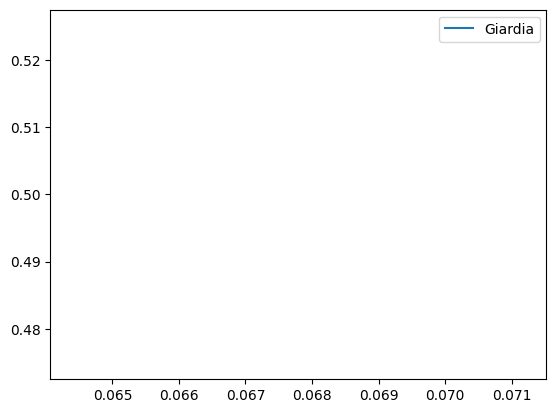

In [58]:
# plot the precision recall curve
for category in categories:
    sns.lineplot(
        x=recalls[category],
        y=precisions[category],
        label=gt_annos["categories"][category]["name"],
        
    )


